Memory Usage: 103899136


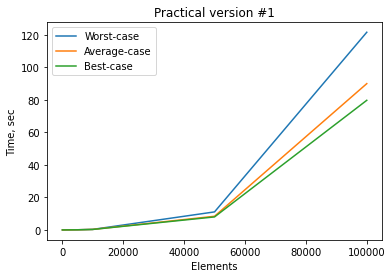

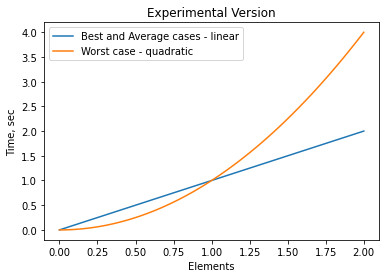

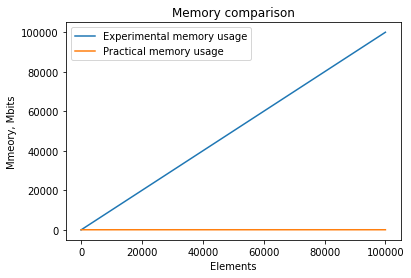

In [160]:
import numpy as np
from time import process_time 
import os, psutil
import matplotlib.pyplot as plt
import copy
from numpy import random

t1 = 0
x = random.randint(1000000, size=(100000)) #creating list
#add primary sorting before Bucket sort
#x = sorted(x, key=None, reverse=True)
process = psutil.Process(os.getpid())
# ------------------------------------
#Bucket Sort Implementation in Python
#https://stackabuse.com/bucket-sort-in-python/
def insertion_sort(bucket):
    for i in range (1, len (bucket)):
        var = bucket[i]
        j = i - 1
        while (j >= 0 and var < bucket[j]):
            bucket[j + 1] = bucket[j]
            j = j - 1
        bucket[j + 1] = var
        
def bucket_sort(input_list):
    # Find maximum value in the list and use length of the list to determine which value in the list goes into which bucket 
    max_value = max(input_list)
    size = max_value/len(input_list)

    # Create n empty buckets where n is equal to the length of the input list
    buckets_list= []
    for x in range(len(input_list)):
        buckets_list.append([]) 

    # Put list elements into different buckets based on the size
    for i in range(len(input_list)):
        j = int (input_list[i] / size)
        if j != len (input_list):
            buckets_list[j].append(input_list[i])
        else:
            buckets_list[len(input_list) - 1].append(input_list[i])

    # Sort elements within the buckets using Insertion Sort
    for z in range(len(input_list)):
        insertion_sort(buckets_list[z])
            
    # Concatenate buckets with sorted elements into a single list
    final_output = []
    for x in range(len (input_list)):
        final_output = final_output + buckets_list[x]
    return final_output


def main():
    input_list = x
    print('ORIGINAL LIST:')
    #print(input_list)
    t1_start = process_time()
    sorted_list = bucket_sort(input_list)
   # print(sorted_list)
    t1_stop = process_time()
    print("Elapsed time during the whole program in seconds:", t1_stop-t1_start) 
    
#main()

#PRACTICAL VERSION
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot([50,100,500,1000,5000,10000,50000,100000], [0,0,0,0.016,0.09375,0.3281,11.09,121.7], label='Worst-case')  # Plot some data on the (implicit) axes.
ax.plot([50,100,500,1000,5000,10000,50000,100000], [0,0,0,0.016,0.09375,0.3125,8.4,90.0625], label='Average-case')  # etc.
ax.plot([50,100,500,1000,5000,10000,50000,100000], [0,0,0,0.016,0.07812,0.28125,8,79.8], label='Best-case')
ax.set_xlabel('Elements')
ax.set_ylabel('Time, sec')
ax.set_title("Practical version #1")
ax.legend()
#EXPERIMENTAL VERSION 
z = np.linspace(0, 2, 100)

fig, az = plt.subplots()  # Create a figure and an axes.
az.plot(z, z, label='Best and Average cases - linear')  # Plot some data on the (implicit) axes.
az.plot(z, z**2, label='Worst case - quadratic')  # etc.
az.set_xlabel('Elements')
az.set_ylabel('Time, sec')
az.set_title("Experimental Version")
az.legend()

#Memory comparison
k = np.linspace(0, 100000, 100)
fig, ak = plt.subplots()  # Create a figure and an axes.
ak.plot(k, k, label='Experimental memory usage')  # Plot some data on the (implicit) axes.
ak.plot([50,100,500,1000,5000,10000,50000,100000], [83.7,83.8,83.9,84.1,84.8,85,88.5,88.6], label='Practical memory usage')  # etc.
ak.set_xlabel('Elements')
ak.set_ylabel('Mmeory, Mbits')
ak.set_title("Memory comparison")
ak.legend()

#Best case - random range between 0 - 10 000;  + standart sorting before Bucket sort 
#Average case - random range between 0 - 10 000;
#Worst case - random range between 0 - 1000 000

#-------------------------------------
print("Memory Usage:", (process.memory_info().rss))  # in Mbits
    
